In [11]:
###############################
### 연도별 자살자 추세 분석 ###
###############################



#CSV 파일 불러오기

import pandas as pd

suicide_df=pd.read_csv('data/deadreason.csv', encoding='cp949', header = [0,1]) # Multicolumn 설정

suicide_df

사망원인별(103항목)  성별   연령(5세)별     1983                1984             \
   사망원인별(103항목)  성별   연령(5세)별 사망자수 (명) 사망률 (십만명당) 사망자수 (명) 사망률 (십만명당)   
0    고의적 자해(자살)   계         계     3471        8.7     3498        8.7   
1    고의적 자해(자살)   계        0세        0          -        0          -   
2    고의적 자해(자살)   계    1 - 4세        0          -        0          -   
3    고의적 자해(자살)   계    5 - 9세        0          -        0          -   
4    고의적 자해(자살)   계  10 - 14세       49        1.1       40        0.9   
..          ...  ..       ...      ...        ...      ...        ...   
73   고의적 자해(자살)  여자     90세이상        -          -        -          -   
74   고의적 자해(자살)  여자    15세 미만       22        0.4       20        0.3   
75   고의적 자해(자살)  여자  15 - 64세      811        6.4      832        6.4   
76   고의적 자해(자살)  여자    65세 이상       84        8.3       94          9   
77   고의적 자해(자살)  여자      연령미상        0          -        0          -   

       1985                1986  ...     2016                2017             \
   사망자수 (명) 사망률 (십만명당) 사망자수 (명)  ... 사망자수 (명) 사망률 (십만명당) 사망자수 (명) 사망률 (십만명당)   
0      3802        9.3     3564  ...    13092       25.6    12463       24.3   
1         0          -        0  ...        0          -        0          -   
2         0          -        0  ...        0          -        0          -   
3         0          -        0  ...        0          -        1          0   
4        33        0.7       27  ...       22        0.9       35        1.5   
..      ...        ...      ...  ...      ...        ...      ...        ...   
73        -          -        -  ...       80       62.6       46       33.1   
74       13        0.2        7  ...       10        0.3       13        0.4   
75      889        6.7      817  ...     2725       14.9     2521       13.8   
76      121       11.2       88  ...     1114       28.4     1006       24.7   
77        0          -        0  ...        0          -        1          -   

       2018                2019                2020             
   사망자수 (명) 사망률 (십만명당) 사망자수 (명) 사망률 (십만명당) 사망자수 (명) 사망률 (십만명당)  
0     13670       26.6    13799       26.9    13195       25.7  
1         0          -        0          -        0          -  
2         0          -        0          -        0          -  
3         1          0        2        0.1        2        0.1  
4        49        2.1       43        1.9       49        2.1  
..      ...        ...      ...        ...      ...        ...  
73       73       47.9       73       43.6       64       34.7  
74       24        0.7       23        0.7       28        0.9  
75     2782       15.3     2988       16.5     3053       16.9  
76     1002       23.7     1058         24     1021       22.1  
77        0          -        0          -        0          -  

[78 rows x 79 columns]

In [12]:
###데이터 전처리###



#Multicolumn을 묶어 1차원 column 배열로 만듬

column_list = list(map(lambda x: ' '.join(x[0:]),suicide_df.columns))


#df의 column을 변경

suicide_df.columns = column_list


#Multicolumn을 1차원 column으로 만들면서 생긴 중복단어 제거, column명 간소화

suicide_df.rename(columns = {'사망원인별(103항목) 사망원인별(103항목)' : '사망원인', 
                    '성별 성별' : '성별',
                    '연령(5세)별 연령(5세)별' : '연령'}, inplace = True)


#확인

suicide_df.head()

,사망원인,성별,연령,1983 사망자수 (명),1983 사망률 (십만명당),1984 사망자수 (명),1984 사망률 (십만명당),1985 사망자수 (명),1985 사망률 (십만명당),1986 사망자수 (명),...,2016 사망자수 (명),2016 사망률 (십만명당),2017 사망자수 (명),2017 사망률 (십만명당),2018 사망자수 (명),2018 사망률 (십만명당),2019 사망자수 (명),2019 사망률 (십만명당),2020 사망자수 (명),2020 사망률 (십만명당)
0,고의적 자해(자살),계,계,3471,8.7,3498,8.7,3802,9.3,3564,...,13092,25.6,12463,24.3,13670,26.6,13799,26.9,13195,25.7
1,고의적 자해(자살),계,0세,0,-,0,-,0,-,0,...,0,-,0,-,0,-,0,-,0,-
2,고의적 자해(자살),계,1 - 4세,0,-,0,-,0,-,0,...,0,-,0,-,0,-,0,-,0,-
3,고의적 자해(자살),계,5 - 9세,0,-,0,-,0,-,0,...,0,-,1,0,1,0,2,0.1,2,0.1
4,고의적 자해(자살),계,10 - 14세,49,1.1,40,0.9,33,0.7,27,...,22,0.9,35,1.5,49,2.1,43,1.9,49,2.1


In [13]:
###총 자살자와 65세 이상 자살자 list 생성###




#자살자 df 생성 (성별 통합)

sex = (suicide_df.성별 == '계')
df_sex = suicide_df[sex].iloc[:,2:]    #사망원인,성별 column 제거



#조건문으로 자살자 총계 list 생성

dead_sum_list = []


for i in range(1,len(df_sex.columns)):     #반복문
    if '사망자수' in df_sex.columns[i]:    #column에 조건 걸기
        dead_sum_list.append(int(df_sex.loc[0, df_sex.columns[i]]))   #연도별 자살자 총합의 리스트 생성 (string이 있어서 int로 변환)
        

        
        
#조건문으로 65세 이상 자살자 list 생성

old_dead_sum_list = []



#자살자 중 65세 이상의 row를 가진 series 생성

old_ages = df_sex[df_sex['연령']=='65세 이상']


for i in range(1,len(df_sex.columns)):     #반복문
    if '사망자수' in df_sex.columns[i]:    #column에 조건 걸기
        old_dead_sum_list.append(int(old_ages[df_sex.columns[i]]))   #65세 이상 자살자 리스트 생성 (string이 있어서 int로 변환)

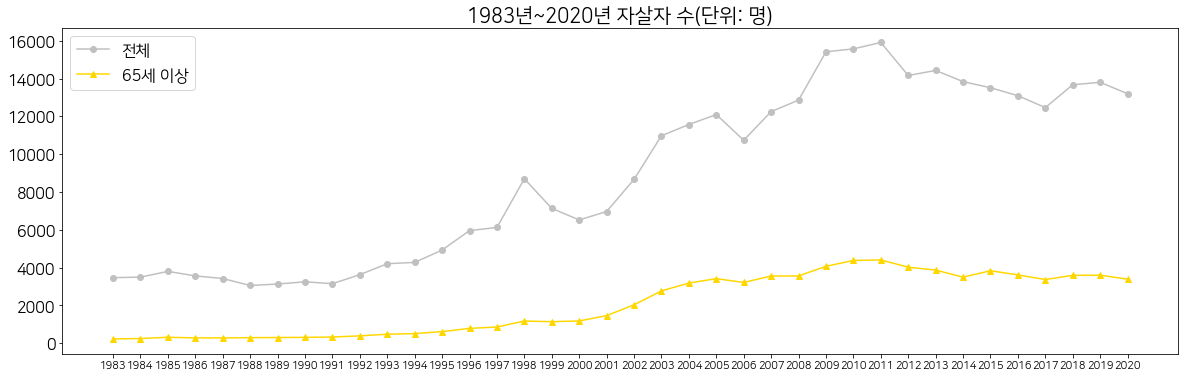

In [14]:
###plot 그래프 만들기###



#platform 모듈

import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='NanumSquare')
else:
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus']=False



#자살자 수 plot 그래프

x_axis = range(1983, 2021) # x축 tick
data1 = dead_sum_list
data2 = old_dead_sum_list


plt.figure(figsize=(20, 6))


plt.plot(x_axis, data1, marker = 'o', label='전체', linestyle='-', color = 'silver')
plt.plot(x_axis, data2, marker = '^', label='65세 이상', linestyle='-', color = 'gold')
plt.title('1983년~2020년 자살자 수(단위: 명)', fontsize= 20)

plt.xticks(x_axis)

plt.legend(fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=16)

plt.show()

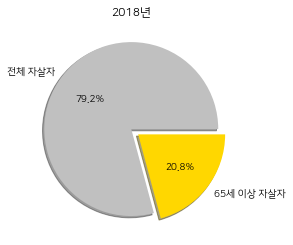

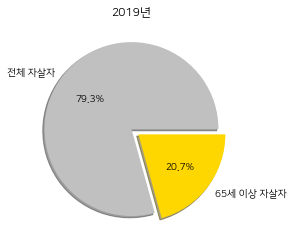

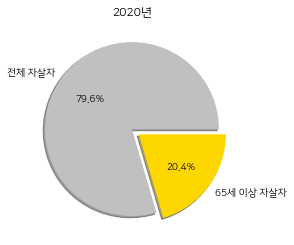

In [15]:
###pie 그래프 만들기###



explode = [0, 0.10]
colors = ['silver', 'gold']


#2018년 자살자 비율
plt.title('2018년')
ratio = [dead_sum_list[-3], old_dead_sum_list[-3]]
labels = ['전체 자살자', '65세 이상 자살자']
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors = colors)
plt.show()


#2019년 자살자 비율

plt.title('2019년')
ratio = [dead_sum_list[-2], old_dead_sum_list[-2]]
labels = ['전체 자살자', '65세 이상 자살자']
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors = colors)
plt.show()


#2020년 자살자 비율

plt.title('2020년')
ratio = [dead_sum_list[-1], old_dead_sum_list[-1]]
labels = ['전체 자살자', '65세 이상 자살자']
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors = colors)
plt.show()

In [16]:
#########################################
### 2021년 개인 서비스 물가 변화 분석 ###
#########################################



#CSV 파일 불러오기

import pandas as pd

ps_df=pd.read_csv('data/personal_service.csv', encoding='utf-8')

ps_df

,품목,지역,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,이용,울산광역시,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400,12400
1,미용,서울특별시,18308,18308,18308,18077,18077,18077,18077,18077,18077,18077,18077,18077
2,미용,광주광역시,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400
3,미용,대전광역시,15600,15600,15600,15600,15600,15600,15600,15600,15600,15600,15600,15600
4,미용,강원도,17222,17222,17222,17222,17222,17222,17556,17556,17000,17000,17000,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,세탁,대구광역시,7500,7500,7500,7667,7667,7667,7667,7667,7667,7667,7667,7667
76,숙박(여관),부산광역시,36429,35714,35429,35714,35714,38571,38571,38571,38571,37857,37571,38286
77,숙박(여관),전라남도,41667,41667,40556,40556,40556,40556,40556,39444,39444,39444,38889,38889
78,목욕,경기도,7077,7154,7212,7250,7250,7250,7250,7288,7308,7308,7346,7466


In [17]:
#품목 종류 확인

ps_kinds = ps_df.groupby('품목').mean()

ps_kinds

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
품목,,,,,,,,,,,,
목욕,6491.500,6487.3750,6495.8125,6509.1875,6513.6250,6506.6875,6505.6250,6508.6875,6530.7500,6593.1250,6651.2500,6677.0625
미용,16164.625,16237.8125,16282.5000,16285.1250,16258.3125,16267.2500,16338.1250,16340.5000,16308.1875,16384.9375,16428.1875,16414.8125
세탁,7234.000,7252.5625,7301.1250,7332.2500,7337.0625,7358.5000,7369.5625,7374.3750,7384.7500,7403.5000,7463.1250,7485.3750
숙박(여관),39303.125,39275.3125,39024.9375,39255.1250,39333.0625,39533.0625,39862.1250,39862.0625,39629.6875,39678.8125,40032.3750,39979.1250
이용,12027.125,12027.1250,12016.7500,12023.0000,12050.2500,12055.0000,12077.6250,12132.4375,12136.6250,12178.8125,12192.2500,12208.5000


In [18]:
#품목의 가격변화를 list로 만드는 함수 정의

def to_list(label, name):

    #품목의 서비스 가격 table 추출

    name_df = ps_df[ps_df['품목']==label]


    #품목의 기간별 가격 변화 series 추출

    name_grouped = (name_df[2:].groupby(name_df['품목']).mean()).iloc[0]


    #series를 list로 변환

    name_list = name_grouped.tolist()


    #list 내의 요소들을 정수로 변경

    for i in range(len(name_list)):
        name_list[i] = int(name_list[i])
        
    return name_list

In [19]:
#to_list 함수를 이용해 list 생성

use_list = to_list('이용', 'use')

beauty_list = to_list('미용', 'beauty')

sleep_list = to_list('숙박(여관)', 'sleep')

bath_list = to_list('목욕', 'bath')

wash_list = to_list('세탁', 'wash')

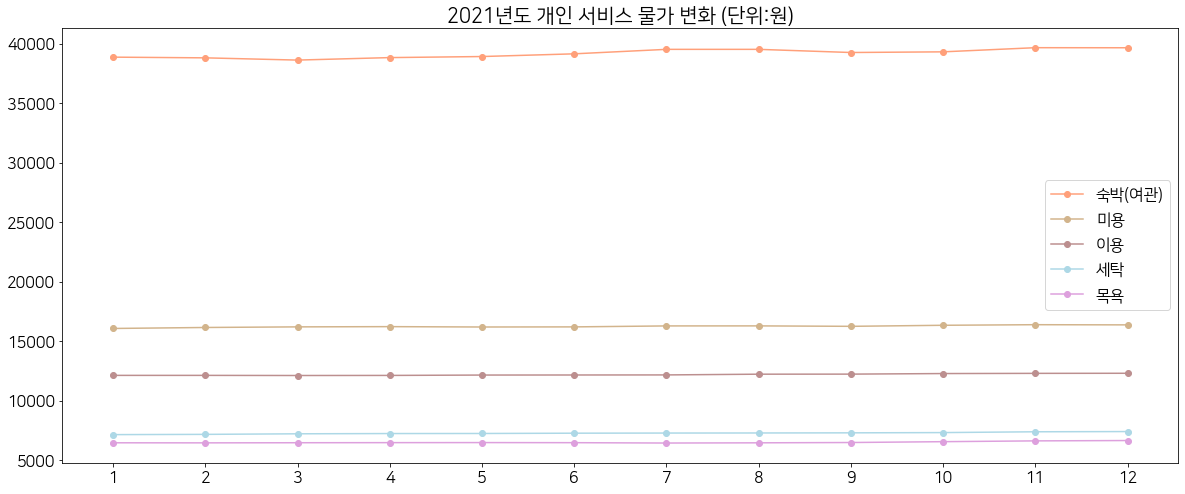

In [20]:
###그래프 만들기###



#platform 모듈

import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='NanumSquare')
else:
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus']=False



#개인서비스 가격 변화 플롯 그래프

x_axis = range(1, len(use_list)+1) # x축 tick
data1 = use_list
data2 = beauty_list
data3 = sleep_list
data4 = bath_list
data5 = wash_list
plt.figure(figsize=(20, 8))

plt.plot(x_axis, data3, marker = 'o', label='숙박(여관)', linestyle='-', color = 'lightsalmon')
plt.plot(x_axis, data2, marker = 'o', label='미용', linestyle='-', color = 'tan')
plt.plot(x_axis, data1, marker = 'o', label='이용', linestyle='-', color = 'rosybrown')
plt.plot(x_axis, data5, marker = 'o', label='세탁', linestyle='-', color = 'lightblue')
plt.plot(x_axis, data4, marker = 'o', label='목욕', linestyle='-', color = 'plum')

plt.title('2021년도 개인 서비스 물가 변화 (단위:원)', size=20)

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(x_axis)
plt.show()

In [21]:
#########################################
### 2021년 공공 서비스 물가 변화 분석 ###
#########################################




#CSV 파일 불러오기

import pandas as pd

pp_df = pd.read_csv('data/public_price.csv', encoding='utf-8')

pp_df

,품목,변환명,지역,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,시내버스,카드,서울특별시,1200.0,1200.0,1200.0,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.0,1200.000000
1,시내버스,카드,광주광역시,1250.0,1250.0,1250.0,1250.0,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0,1250.0,1250.000000
2,시내버스,카드,대구광역시,1250.0,1250.0,1250.0,1250.0,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0,1250.0,1250.000000
3,시내버스,카드,대전광역시,1250.0,1250.0,1250.0,1250.0,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0,1250.0,1250.000000
4,시내버스,카드,부산광역시,1200.0,1200.0,1200.0,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.0,1200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,택시,현금,전라북도,3700.0,3700.0,3700.0,3700.0,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.0,3700.0,3700.000000
183,택시,현금,충청남도,3313.0,3313.0,3313.0,3313.0,3313.333333,3313.333333,3313.333333,3313.333333,3313.333333,3313.0,3313.0,3313.333333
184,택시,현금,충청북도,3300.0,3300.0,3300.0,3300.0,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.0,3300.0,3300.000000
185,택시,현금,제주도,3300.0,3300.0,3300.0,3300.0,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.0,3300.0,3300.000000


In [22]:
#품목 확인

pp_df.groupby('품목').mean()

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
품목,,,,,,,,,,,,
도시가스,5347.450980,5310.901961,5310.901961,5311.117647,5311.383788,5347.499514,5349.702200,5277.486482,5276.156863,5276.156863,5273.532147,5273.564371
상수도,12298.705882,12405.294118,12408.411765,12412.647059,12417.593837,12418.998011,12461.757868,12461.757868,12462.764706,12462.764706,12471.140665,12474.304230
시내버스,1294.606061,1301.852941,1300.382353,1300.382353,1304.347399,1305.013706,1308.375051,1308.375051,1308.375051,1308.352941,1309.480078,1309.701833
쓰레기봉투,532.470588,533.117647,533.117647,533.529412,533.462195,533.727850,535.925013,535.925013,536.235294,536.235294,536.174598,536.407746
전철,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333,1320.833333
택시,3429.941176,3436.647059,3447.823529,3447.823529,3447.843137,3447.843137,3447.843137,3447.843137,3447.843137,3447.823529,3447.823529,3477.254902
하수도,7865.705882,8167.882353,8172.294118,8151.352941,8151.290016,8153.453204,8169.781477,8169.781477,8180.588235,8180.588235,8189.533995,8193.422578


In [23]:
#품목의 가격변화를 list로 만드는 함수 정의

def price_to_list(label, name):
    name_df = pp_df[pp_df['품목']==label]
    name_series = name_df.groupby('품목').mean().iloc[0]


    name_list = name_series.tolist()

    for i in range(len(name_list)):
            name_list[i] = int(name_list[i])

    return name_list

In [24]:
#price_to_list 함수 사용해서 list 생성

gas_list = price_to_list('도시가스', 'gas')

upwater_list = price_to_list('상수도', 'upwater')

bus_list = price_to_list('시내버스', 'bus')

trash_list = price_to_list('쓰레기봉투', 'trash')

rail_list = price_to_list('전철', 'rail')

taxi_list = price_to_list('택시', 'taxi')

downwater_list = price_to_list('하수도', 'downwater')

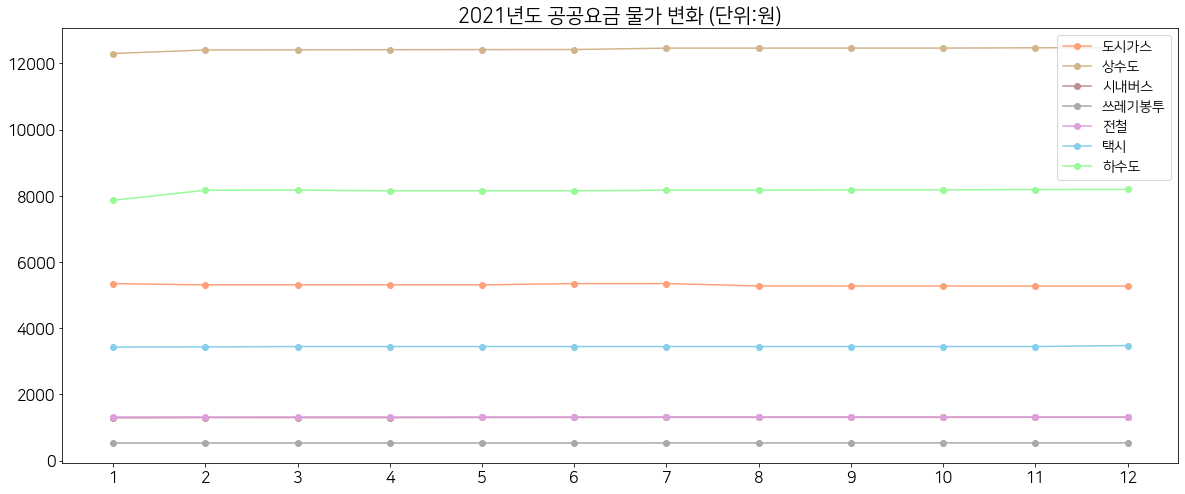

In [25]:
###그래프 만들기###



#platform 모듈

import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='NanumSquare')
else:
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus']=False



#공공서비스 가격변화 플롯 그래프

x_axis = range(1, len(gas_list)+1) # x축 tick
data1 = gas_list
data2 = upwater_list
data3 = bus_list
data4 = trash_list
data5 = rail_list
data6 = taxi_list
data7 = downwater_list

plt.figure(figsize=(20, 8))

plt.plot(x_axis, data1, marker = 'o', label='도시가스', linestyle='-', color = 'lightsalmon')
plt.plot(x_axis, data2, marker = 'o', label='상수도', linestyle='-', color = 'tan')
plt.plot(x_axis, data3, marker = 'o', label='시내버스', linestyle='-', color = 'rosybrown')
plt.plot(x_axis, data4, marker = 'o', label='쓰레기봉투', linestyle='-', color = 'darkgrey')
plt.plot(x_axis, data5, marker = 'o', label='전철', linestyle='-', color = 'plum')
plt.plot(x_axis, data6, marker = 'o', label='택시', linestyle='-', color = 'skyblue')
plt.plot(x_axis, data7, marker = 'o', label='하수도', linestyle='-', color = 'palegreen')

plt.title('2021년도 공공요금 물가 변화 (단위:원)', size=20)

plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(x_axis)
plt.show()